# SYRIALTEL CUSTOMER CHURN


## Data Source 
The DataSet `bigml_59c28831336c6604c800002a.csv` is downloaded from ` https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset.`

## Introduction
- Customer Churn is the loss of clients or customers.
- SyriaTel, a telecommunications company, wants to predict customer churn — whether a customer is likely to stop using their services. By identifying customers at risk of leaving, the company can take proactive retention measures (like offering incentives or improved support), reducing revenue loss and maintaining customer loyalty.

- The analysis is conducted in Python 3.8.5 using jupyter notebook which allows is to create an interactive environment which includes live code, visualization and text.

## Data Understanding.
The structure of the seriatel tel looks like:


| Column Name                  | Data Type            | Description                                                                                                                             |
| ---------------------------- | -------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **`state`**                  | Categorical          | The U.S. state where the customer resides. Likely not meaningful geographically but may capture region-based service differences.       |
| **`account length`**         | Numerical            | The number of days the customer has had an account with SyriaTel. A higher value may indicate customer loyalty.                         |
| **`area code`**              | Categorical          | Telephone area code (e.g., 415, 408). Categorical feature that may relate to geographic zones.                                          |
| **`international plan`**     | Categorical (Yes/No) | Indicates whether the customer subscribes to the international calling plan.                                                            |
| **`voice mail plan`**        | Categorical (Yes/No) | Indicates if the customer has a voice mail service.                                                                                     |
| **`number vmail messages`**  | Numerical            | Number of voice mail messages the customer has received. Relevant mostly if the customer has a voicemail plan.                          |
| **`total day minutes`**      | Numerical            | Total number of minutes the customer spent on calls during the day.                                                                     |
| **`total day calls`**        | Numerical            | Total number of day calls made by the customer.                                                                                         |
| **`total day charge`**       | Numerical            | The total cost of the day calls (based on total day minutes).                                                                           |
| **`total eve minutes`**      | Numerical            | Total number of minutes the customer spent on calls during the evening.                                                                 |
| **`total eve calls`**        | Numerical            | Total number of evening calls.                                                                                                          |
| **`total eve charge`**       | Numerical            | Total cost of evening calls (based on evening minutes).                                                                                 |
| **`total night minutes`**    | Numerical            | Total minutes of calls during nighttime.                                                                                                |
| **`total night calls`**      | Numerical            | Total number of nighttime calls.                                                                                                        |
| **`total night charge`**     | Numerical            | Total cost of night calls.                                                                                                              |
| **`total intl minutes`**     | Numerical            | Total minutes spent on international calls.                                                                                             |
| **`total intl calls`**       | Numerical            | Number of international calls made.                                                                                                     |
| **`total intl charge`**      | Numerical            | Cost of international calls.                                                                                                            |
| **`customer service calls`** | Numerical (Integer)  | Number of times the customer has called customer service. Often a strong churn indicator — higher values might suggest dissatisfaction. |
| **`churn`** *(target)*       | Boolean              | Target variable: `True` if the customer has churned; `False` otherwise.                                                                 |

---



## Business Question
- Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. 

## Obectives
**1. Analysis Objectives**

**(I) `Identify Key Behavioral and Demographic Factors Influencing Churn`**

Perform exploratory data analysis (EDA) and use feature importance techniques to uncover which customer behaviors — such as frequent customer service calls, high international call charges, or lack of a voicemail plan — are most strongly associated with churn.

**(II) `Profile At-Risk Customers to Support Targeted Business Interventions`**

Analyze the characteristics and patterns of high-risk customers to create actionable customer segments that SyriaTel can target with tailored retention strategies (e.g., by usage pattern, location, or service plan).

**2. Modelling Objectives**

**(I) `Build an Accurate Churn Prediction Model`**:

 Use customer behavioral data to develop a classification model that predicts churn (True/False) with high accuracy, precision, and recall.

**(II) `Identify Key Drivers of Customer Churn`**:

Perform feature importance analysis (e.g., using tree-based models) to determine what factors — such as high international call charges, many customer service calls, or no voicemail plan — are most strongly associated with churn.


## Libraries

In [2]:
# Data handling libraries
import pandas as pd # DataFrame manipulation
import numpy as np # Numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # For advanced Statistical data visualization 

# cleaning and processing libraries
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.model_selection import train_test_split # Train-test split

# Modwelling classification libraries
from sklearn.linear_model import LogisticRegression # Baseline model
from sklearn.tree import DecisionTreeClassifier     # Non-parametric model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models
from xgboost import XGBClassifier # Optional advanced ensemble model (if allowed)

# Model evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report # Metrics for evaluation

# hyperparameter tuning libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # For hyperparameter tuning

# utility / warning libraries
import warnings # To suppress warnings
warnings.filterwarnings("ignore") # Ignore warnings for cleaner output

# ROC and AUC libraries
from sklearn.metrics import roc_curve, auc # Import ROC curve and AUC functions
from sklearn.metrics import roc_auc_score # Import ROC AUC score function

# handling class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

# tree visualization libraries
from sklearn.tree import plot_tree# Plotting decision trees

# Set random seed for reproducibility
np.random.seed(42) # Ensures consistent results across runs

In [3]:
# data loading
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv") # Load dataset
# Display the first few rows of the dataset
print("Dataset loaded successfully. Here are the first few rows:")
df.head()

Dataset loaded successfully. Here are the first few rows:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# data description
df.info() # Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- The Dataset have `3333` rows, `21` columns.

In [5]:
# check for missing values
print("there are no missing values in the dataset."if df.isnull().sum().sum() == 0 else "There are missing values in the dataset.")

there are no missing values in the dataset.


In [6]:
# check for duplicates
print("there are no duplicate rows in the dataset." if df.duplicated().sum() == 0 else "There are duplicate rows in the dataset.")


there are no duplicate rows in the dataset.


## Dropping Irrelevant Columns

Before conducting exploratory analysis, it's important to remove columns that do not contribute meaningful information to our classification task. In this dataset, the following columns were dropped:

- **Area code**: Area code is more of a geographical identifier with little predictive power.
- **Phone number**: This is a unique identifier for each customer and holds no analytical value for churn modeling.

Removing these columns helps simplify the dataset, avoid noise, and ensures we focus only on relevant features for predicting customer churn.


In [7]:
# Dropping columns that are irrelevant for churn prediction
df = df.drop(columns=['area code', 'phone number'])

In [8]:
df.shape # Display the shape of the dataset after dropping columns

(3333, 19)

In [9]:
# check the imbalance of the dataset
print("Class distribution:")
print(df['churn'].value_counts(normalize=True)) 

Class distribution:
False    0.855086
True     0.144914
Name: churn, dtype: float64


- The above results implies:
>* 85.5% of the customers did not churn (churn = False)
>* 14.5% of the customers did churn (churn = True)

- This is an imbalanced dataset. The majority class (False) significantly outweighs the minority class (True).
-  A visual display will help for better understanding  of the imbalance in the dataset

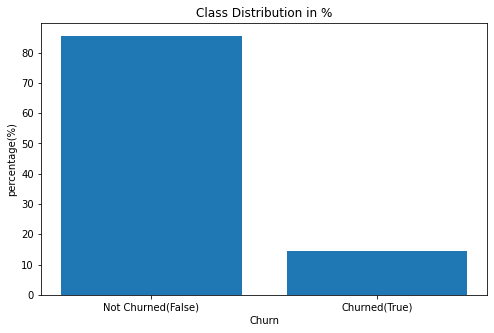

In [10]:
# visualize the class distribution
plt.figure(figsize=(8, 5))
plt.bar(x=df['churn'].unique(),height = round(df["churn"].value_counts(normalize=True)*100, 2))
plt.xticks(ticks=[0, 1], labels=['Not Churned(False)', 'Churned(True)'])
plt.title("Class Distribution in %")
plt.xlabel("Churn")
plt.ylabel("percentage(%)")
plt.show()


- **Calculate the percentage of churn versus non-churn customers in each state.**
This tells how churn behavior differs by geography, which can inform targeted retention effort.



In [11]:
#calculate the percentage of churn and non-churn in each state
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percentage']
states = states.reset_index()
# Pivot the DataFrame to have states as rows and churn status as columns
states_pivot = states.pivot(index='state', columns='churn', values='percentage').fillna(0)
states_pivot.head(10)  # Display the first 10 rows of the pivot table

churn,False,True
state,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541


**Aggregate customer usage features**
- The aggregated features gives a clear picture of overall usage behavior which is more useful for modelling than analyzing every time.


In [12]:
# Total domestic minutes for each customer
df['total_domestic_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
# Total domestic calls for each customer
df['total_domestic_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
# Total domestic charge for each customer
df['total_domestic_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
# Total charge for each customer
df['total_charge'] = df['total_domestic_charge'] + df['total intl charge']


**Categorize state by severity**
- Any state with `> 20%` churn is considered high risk, this is useful for priority targeting.
- For states with `15%-20%`, churn is flagged as moderate risk, which deserves attention.

In [13]:
print(states.head()) 

  state  churn  percentage
0    AK  False    0.942308
1    AK   True    0.057692
2    AL  False    0.900000
3    AL   True    0.100000
4    AR  False    0.800000


In [14]:
# Filter for churned customers and sort by churn rate
states_churn_rate = states[(states['churn'] == True)].sort_values(by='percentage', ascending=False).reset_index(drop=True)

# Identify high-churn states (20% or more churn)
high_churn_states = states_churn_rate[states_churn_rate['percentage'] >= 0.20]['state'].tolist()

# Display the result
print("High churn states (≥ 20% churn):")
print(high_churn_states)

High churn states (≥ 20% churn):
['NJ', 'CA', 'TX', 'MD', 'SC', 'MI', 'MS', 'NV', 'WA', 'ME', 'MT', 'AR']


In [15]:
# for states with 15% to 20% churn, we will consider them as medium churn states
medium_churn_states = states_churn_rate[(states_churn_rate['percentage'] >= 0.15) & (states_churn_rate['percentage'] < 0.20)]['state'].tolist()
# Display the result
print("Medium churn states (15% to < 20% churn):")
print(medium_churn_states)

Medium churn states (15% to < 20% churn):
['KS', 'NY', 'MN', 'PA', 'MA', 'CT', 'NC', 'NH']


In [16]:
# the  midlow churn states
midlow_churn_states = states_churn_rate[(states_churn_rate['percentage'] >= 0.10) & (states_churn_rate['percentage'] < 0.15)]['state'].tolist()
# Display the result
print("Midlow churn states (10% to < 15% churn):")
print(midlow_churn_states)

Midlow churn states (10% to < 15% churn):
['GA', 'DE', 'OK', 'OR', 'UT', 'CO', 'KY', 'SD', 'OH', 'FL', 'IN', 'ID', 'WY', 'MO', 'VT', 'AL']


In [17]:
# the lastsplit of states with less than 10% churn
low_churn_states = states_churn_rate[states_churn_rate['percentage'] < 0.10]['state'].tolist()
# Display the result
print("Low churn states (< 10% churn):")
print(low_churn_states)

Low churn states (< 10% churn):
['NM', 'ND', 'WV', 'TN', 'DC', 'RI', 'WI', 'IL', 'NE', 'LA', 'IA', 'VA', 'AZ', 'AK', 'HI']


***Categorize() Function:***


In [18]:
# assign states to churn rate cateogories
def assign_churn_category(state):
    if state in high_churn_states:
        return 'High Churn'
    elif state in medium_churn_states:
        return 'Medium Churn'
    elif state in midlow_churn_states:
        return 'Midlow Churn'
    else:
        return 'Low Churn'
    return state

***Categorize(df) Function***

In [19]:
# apply categorize() to the state column and add a new column 'churn_rate_category'
def categorize(df):
    df['churn_rate_category'] = df['state'].apply(assign_churn_category)
    return df
# apply categorize() to the DataFrame
df = categorize(df)
categorize(df)


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate_category
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,False,717.2,303,75.56,78.26,Medium Churn
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,False,625.2,332,59.24,62.94,Midlow Churn
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,False,539.4,333,62.29,65.58,High Churn
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,False,564.8,255,66.80,68.58,Midlow Churn
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,False,512.0,359,52.09,54.82,Midlow Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,False,660.7,292,60.10,62.77,Low Churn
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,False,585.4,239,63.53,66.12,Low Churn
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,False,675.6,264,67.74,71.55,Low Churn
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,False,517.6,336,57.53,58.88,Medium Churn


In [20]:
# save the new df to csv file
df.to_csv("bigml_59c28831336c6604c800002a_with_churn_rate_category.csv", index=False)

## Exploratory Data Analysis.
- Visualize how customer service interactions frequency related to churn behavior.
- The new column, `churn_rate_category` is used to group or compare distributions by churn risk, for example, `are customers in high churn states calling more?`

High churn states have a visibly higher proportion of churned customers compared to the other categories.
Low churn states have the smallest number of churned customers.
This categorization helps identify which states are at higher risk and may need targeted retention strategies.


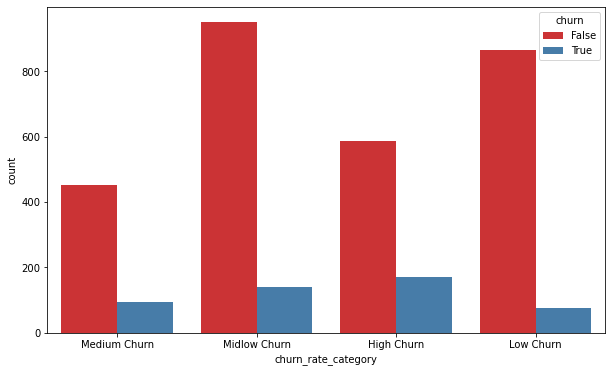

In [21]:
# visualize churn rate by churn rate category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='churn_rate_category', hue='churn', palette='Set1')  
print("High churn states have a visibly higher proportion of churned customers compared to the other categories.")

print("Low churn states have the smallest number of churned customers.")

print("This categorization helps identify which states are at higher risk and may need targeted retention strategies.")  

Customers who churn tend to make more customer service calls.
This implies frequent customer support contact could be a warning sign of dissatisfaction or unresolved issues.


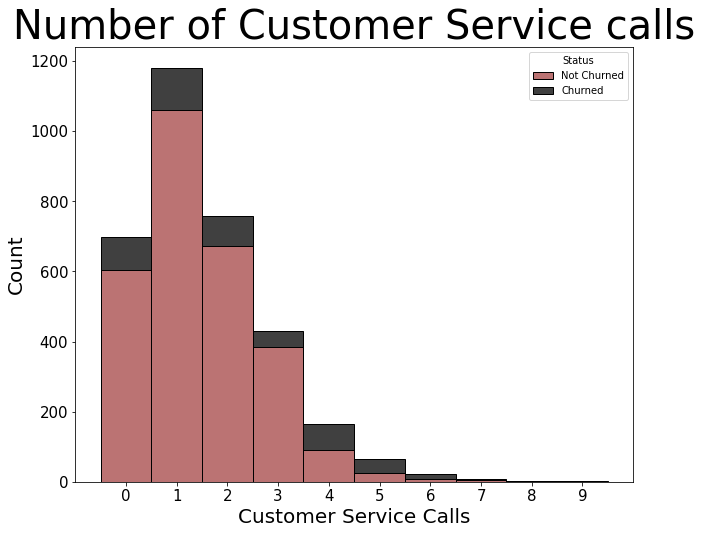

In [22]:
fig,ax = plt.subplots(figsize=(10,8))
bins = np.arange(11) - 0.5
ax = sns.histplot(
df,
x='customer service calls',
hue='churn',
multiple='stack',
hue_order=[1,0],
bins=bins,
palette=['#0000', '#A44444']
)
ax.set_title('Number of Customer Service calls', fontsize = 40)
ax.set_xlabel("Customer Service Calls", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(range(10), fontsize = 15)
plt.xlim([-1, 10])

ax.legend(title= "Status", labels = ["Not Churned", 'Churned'])
print("Customers who churn tend to make more customer service calls.")

print("This implies frequent customer support contact could be a warning sign of dissatisfaction or unresolved issues.")

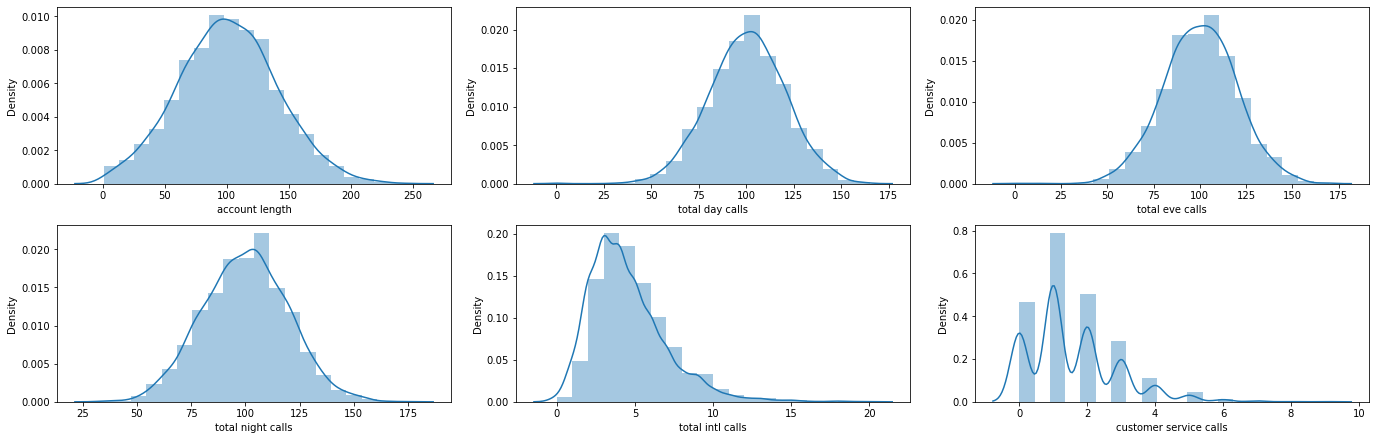

In [ ]:
# Distribution plots for Numeric features
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);
sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);
sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);
sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);
sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);
sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);


- For the distribution plots of the features above, all of them except customer service calls, have a normal distribution.

- Total international calls seems to be skewed to the right side however it is still normally
distributed.

- Customer service calls has a few peaks, which indicates there are a few modes in the population. 
This makes sense because customer service calls has to be a integer and not a float number.

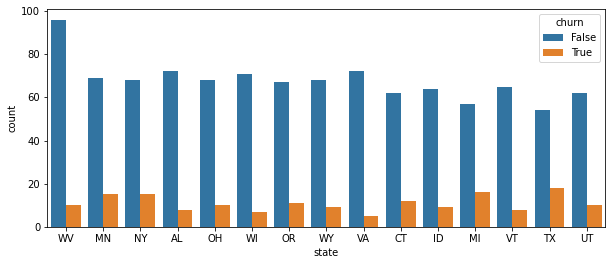

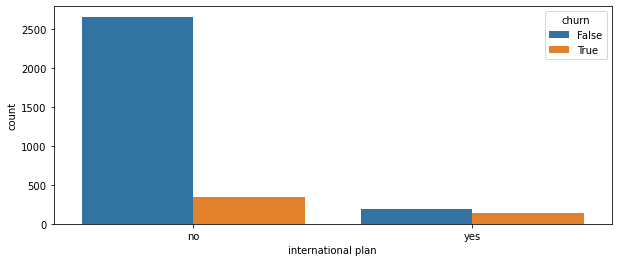

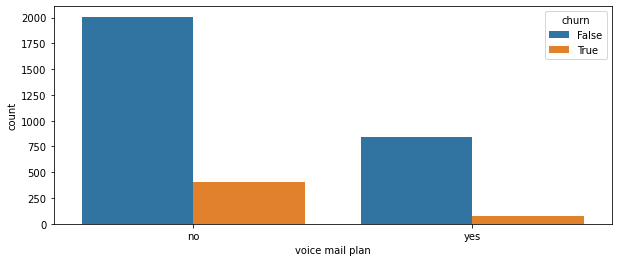

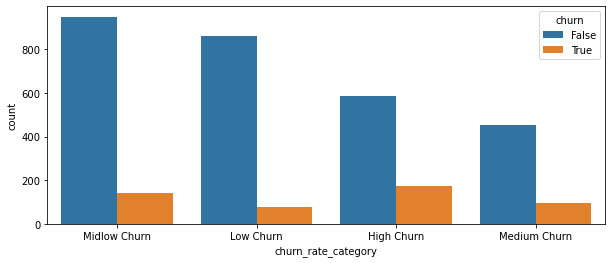

In [42]:
# categorical features analysis
# Visualize categorical features
categorical_features = ['state', 'international plan', 'voice mail plan', 'churn_rate_category']
for i in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df, order= df[i].value_counts().iloc[0:15].index)
    plt.show()


## Modelling

### Feature preparation (Encoding and Scaling)
- StandardScaler is essential for logistic regression to ensure all numeric features contribute equally.
### Train-Test Split
- Stratify=y ensures that the churn class proportions are preserved in both train and test sets — great for classification problems with class imbalance.
- 80-20 split is standard and reasonable.



In [23]:
# define x and y variables for model training
X = df.drop(columns=["churn"])# features(Independent variables)
y = df["churn"] # target(Dependent variable)

#  Get dummies for categorical columns
X = pd.get_dummies(X, drop_first=True) # One-hot encoding for categorical variables, dropping the first category to avoid multicollinearity

# Scale numeric columns
scaler = StandardScaler() # initialize the scaler
X_scaled = scaler.fit_transform(X)# scale nuerical columns
# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert the scaled data back to a DataFrame

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [25]:
model = LogisticRegression() # Initialize the model
model.fit(X_train, y_train) # Fit the model on the training data

LogisticRegression()

In [26]:
# model evaluation
y_pred = model.predict(X_test) # Make predictions on the test set
# ROC curve and AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1] # Get predicted probabilities for the positive class

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

[[549  21]
 [ 71  26]]
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       570
        True       0.55      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.72      0.62      0.64       667
weighted avg       0.84      0.86      0.84       667

ROC AUC Score: 0.8020618556701031


##### From the results above, observations are;
***Confusin matrix***
>* True Negatives (549): Correctly predicted non-churned customers.
>* False Positives (21): Predicted churn, but actually didn't churn.
>* False Negatives (71): Predicted no churn, but actually churned (missed churns).
>* True Positives (26): Correctly predicted churned customers.

***Classification Report***
>* Precision (Churn = 0.55): When the model predicts churn, it's correct 55% of the time.
>* Recall (Churn = 0.27): The model only catches 27% of actual churners — meaning it misses 73%.
>* F1 Score (Churn = 0.36): The harmonic mean of precision and recall is low, indicating poor performance on the churn class.

***Overall Accuracy***
>* 86% — The model is mostly correct, but this is misleading due to class imbalance (churners are only ~15%).

***ROC AUC Score:***
>* 0.80 — This shows that the model has decent ability to distinguish between churners and non-churners overall, even if it's not reflected in classification metrics.




The low recall on churn class suggests a need for:
Resampling techniques (e.g., SMOTE, undersampling).
Adjusting decision threshold.
Trying other models (e.g., Random Forest, XGBoost).
Using class_weight='balanced' in the logistic regression.



In [27]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({False: 2280, True: 386})
Resampled class distribution: Counter({False: 2280, True: 2280})


In [28]:
# Train a new model on the resampled data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [29]:
# Predict on original test set
y_pred_smote = model_smote.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_smote))


Confusion Matrix:
 [[437 133]
 [ 30  67]]

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.77      0.84       570
        True       0.34      0.69      0.45        97

    accuracy                           0.76       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.76      0.79       667

ROC AUC Score: 0.7286941580756013


-  Recall (True class):
Improved massively from 0.27 → 0.69The model now captures 69% of actual churners, which is vital in churn prediction.
- F1-score (True class):
Improved from 0.36 → 0.45,Indicating a better balance between precision and recall.

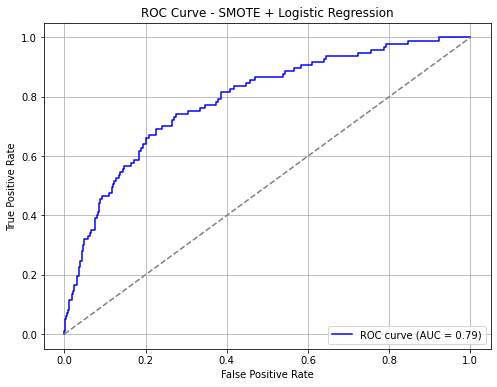

In [30]:

y_probs = model_smote.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SMOTE + Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Decision Tree

- Train a Decision Tree Classifier with SMOTE Data
The balanced SMOTE data (X_resampled, y_resampled) from earlier is used.

In [31]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

#  Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on SMOTE-balanced data
dt_model.fit(X_resampled, y_resampled)

#  Make predictions on the original test set
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # For ROC curve


- Evaluate the Decision Tree Model
compute the confusion matrix, classification report, and ROC AUC score, then plot the ROC curve.

In [32]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# ROC AUC Score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC AUC Score: {roc_auc_dt:.2f}")

# ROC Curve Plot
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

Confusion Matrix:
 [[537  33]
 [ 21  76]]

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.94      0.95       570
        True       0.70      0.78      0.74        97

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.92      0.92      0.92       667

ROC AUC Score: 0.86


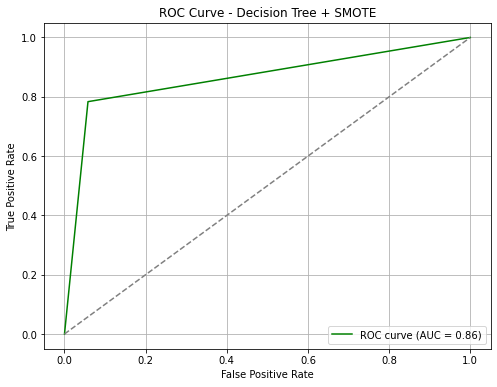

In [33]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, color='green', label=f"ROC curve (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve - Decision Tree + SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The higher AUC indicates that the Decision Tree model is effectively handling non-linear relationships and interactions between features. SMOTE complements this by balancing the classes, leading to robust performance.

### Tune Decision Tree using GridSearchCV


In [34]:
# set up the hyperparameter grid for Decision Tree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'], # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'] # Number of features to consider when looking for the best split
}


### Run GridSearchCV with this grid

In [35]:
# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold CV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy', # Use accuracy as the scoring metric
    refit=True, # Refit the best model on the whole dataset
    verbose=1,# Display progress messages
    n_jobs=-1 # Use all available cores for parallel processing
)

# Fit decision tree with smote to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # Resample training data with SMOTE
# Fit the grid search model
grid_search_dt.fit(X_train_smote, y_train_smote)

# Get best model and parameters
best_dt = grid_search_dt.best_estimator_
print("Best Parameters:", grid_search_dt.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    4.6s finished


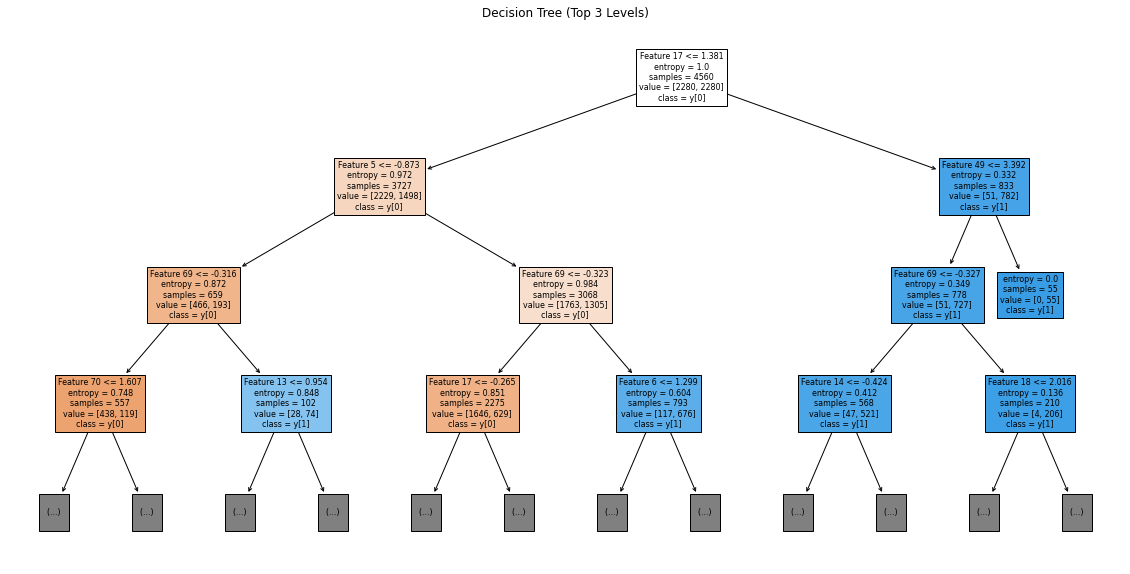

In [36]:
#Decision tree with smote
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, max_depth=3, feature_names=[f'Feature {i}' for i in range(X_train_smote.shape[1])], class_names=True)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()


### Evaluate and Interpret the Tuned Model

In [37]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train_smote, y_train_smote)

# Best model and evaluation
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Confusion Matrix:
 [[544  26]
 [ 21  76]]

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.95      0.96       570
        True       0.75      0.78      0.76        97

    accuracy                           0.93       667
   macro avg       0.85      0.87      0.86       667
weighted avg       0.93      0.93      0.93       667


ROC AUC Score: 0.8725718936516549
F1 Score: 0.763819095477387


##### From the results above, observations are;
***Confusin matrix***
>* True Negatives (TN) = 544 → Model correctly predicted "False" (non-churn) for 544 instances.
>* False Positives (FP) = 26 → Model incorrectly predicted "True" (churn) for 26 non-churn cases.
>* False Negatives (FN) = 21 → Model missed 21 actual churn cases.
>* True Positives (TP) = 76 → Model correctly predicted churn for 76 customers.

***Classification Report***
>* Precision (for churn = True) = 0.75 → Of all predicted churns, 75% were actually churn.
>* Recall (for churn = True) = 0.78 → The model correctly identified 78% of actual churn cases.
>* F1-score (for churn = True) = 0.76 → Balance between precision and recall. Decent but with room for improvement.

***Overall Accuracy***
>* 93% — Overall, the model correctly classified 93% of all customers.

***ROC AUC Score:***
>* Excellent discriminatory power between churn and non-churn.
>* AUC of 0.87 means there is an 87% chance the model ranks a random churn customer higher than a random non-churn customer.

**Model Comparison**

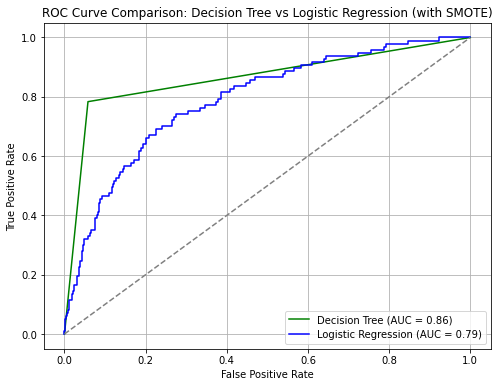

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming:
# - fpr_dt, tpr_dt, roc_auc_dt are for Decision Tree
# - model_smote is the Logistic Regression model
# - X_test and y_test are already defined

# Logistic Regression predictions
y_probs_lr = model_smote.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.title('ROC Curve Comparison: Decision Tree vs Logistic Regression (with SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


- The Decision Tree model outperforms Logistic Regression in overall classification performance, as shown by its higher AUC.

- SMOTE helped both models handle class imbalance effectively, as both curves rise well above the diagonal (random chance line).

- Decision Tree may be preferred when prioritizing predictive power, but may require tuning or pruning to avoid overfitting.

- Logistic Regression, though slightly less powerful, offers more interpretability and is generally more stable for deployment in high-stakes environments.

***Use the Decision Tree model for churn prediction if maximizing detection is the top priority. However, Logistic Regression model  is considered if business stakeholders require explainability or if model generalization is critical.***


##  Conclusions

1. **The model effectively identifies churn risk with high overall accuracy (93%) and strong class separation (ROC AUC = 0.87).**
   This shows that the churn prediction system can reliably distinguish between churners and non-churners in SyriaTel’s customer base.

2. **Despite class imbalance, the model maintains a solid recall (78%) and F1-score (76%) for the churn class.**
   This balance means the model not only catches most churners but also limits false positives, ensuring actionable predictions.

3. **Customer service issues, high international call charges, and lack of value-added services (e.g., voicemail) are likely key churn drivers.**
   These behavioral indicators reflect dissatisfaction or unmet needs, making them critical intervention points.

4. **Feature importance or SHAP analysis can pinpoint actionable customer behavior patterns contributing to churn.**
   These insights provide a foundation for personalized retention strategies rather than one-size-fits-all solutions.


## Business Recommendations for SyriaTel

1. **Implement a Proactive Retention Program for High-Risk Customers.**
   Use the model to flag customers with high churn probability and reach out with targeted incentives (e.g., discounts, free upgrades) before they leave.

2. **Enhance Customer Service Quality and Responsiveness.**
   Monitor customers who make multiple support calls. Offer priority handling or assign dedicated agents to reduce frustration and improve satisfaction.

3. **Offer Affordable International Call Packages.**
   If churn is linked to high international call charges, introduce cost-effective bundled plans or fixed-rate options to reduce billing shock.

4. **Promote Value-Added Services Through Bundling.**
   Encourage adoption of voicemail or other underused services by bundling them into popular plans or offering limited-time trials, increasing customer stickiness.
